## EDA: MLRSNet Dataset

In [135]:
import rarfile
import os
import matplotlib.pyplot as plt
import pandas as pd

In [136]:
imagefolder_path = "/Users/SongYoungOh/Documents/bassconnections/data/MLRSNet A Multi-label High Spatial Resolution Remote Sensing Dataset for Semantic Scene Understanding/Images/"

# Check how many rar files in the folder
rar_files = [f for f in os.listdir(imagefolder_path) if f.endswith(".rar")]
print("Number of rar files: ", len(rar_files))

Number of rar files:  46


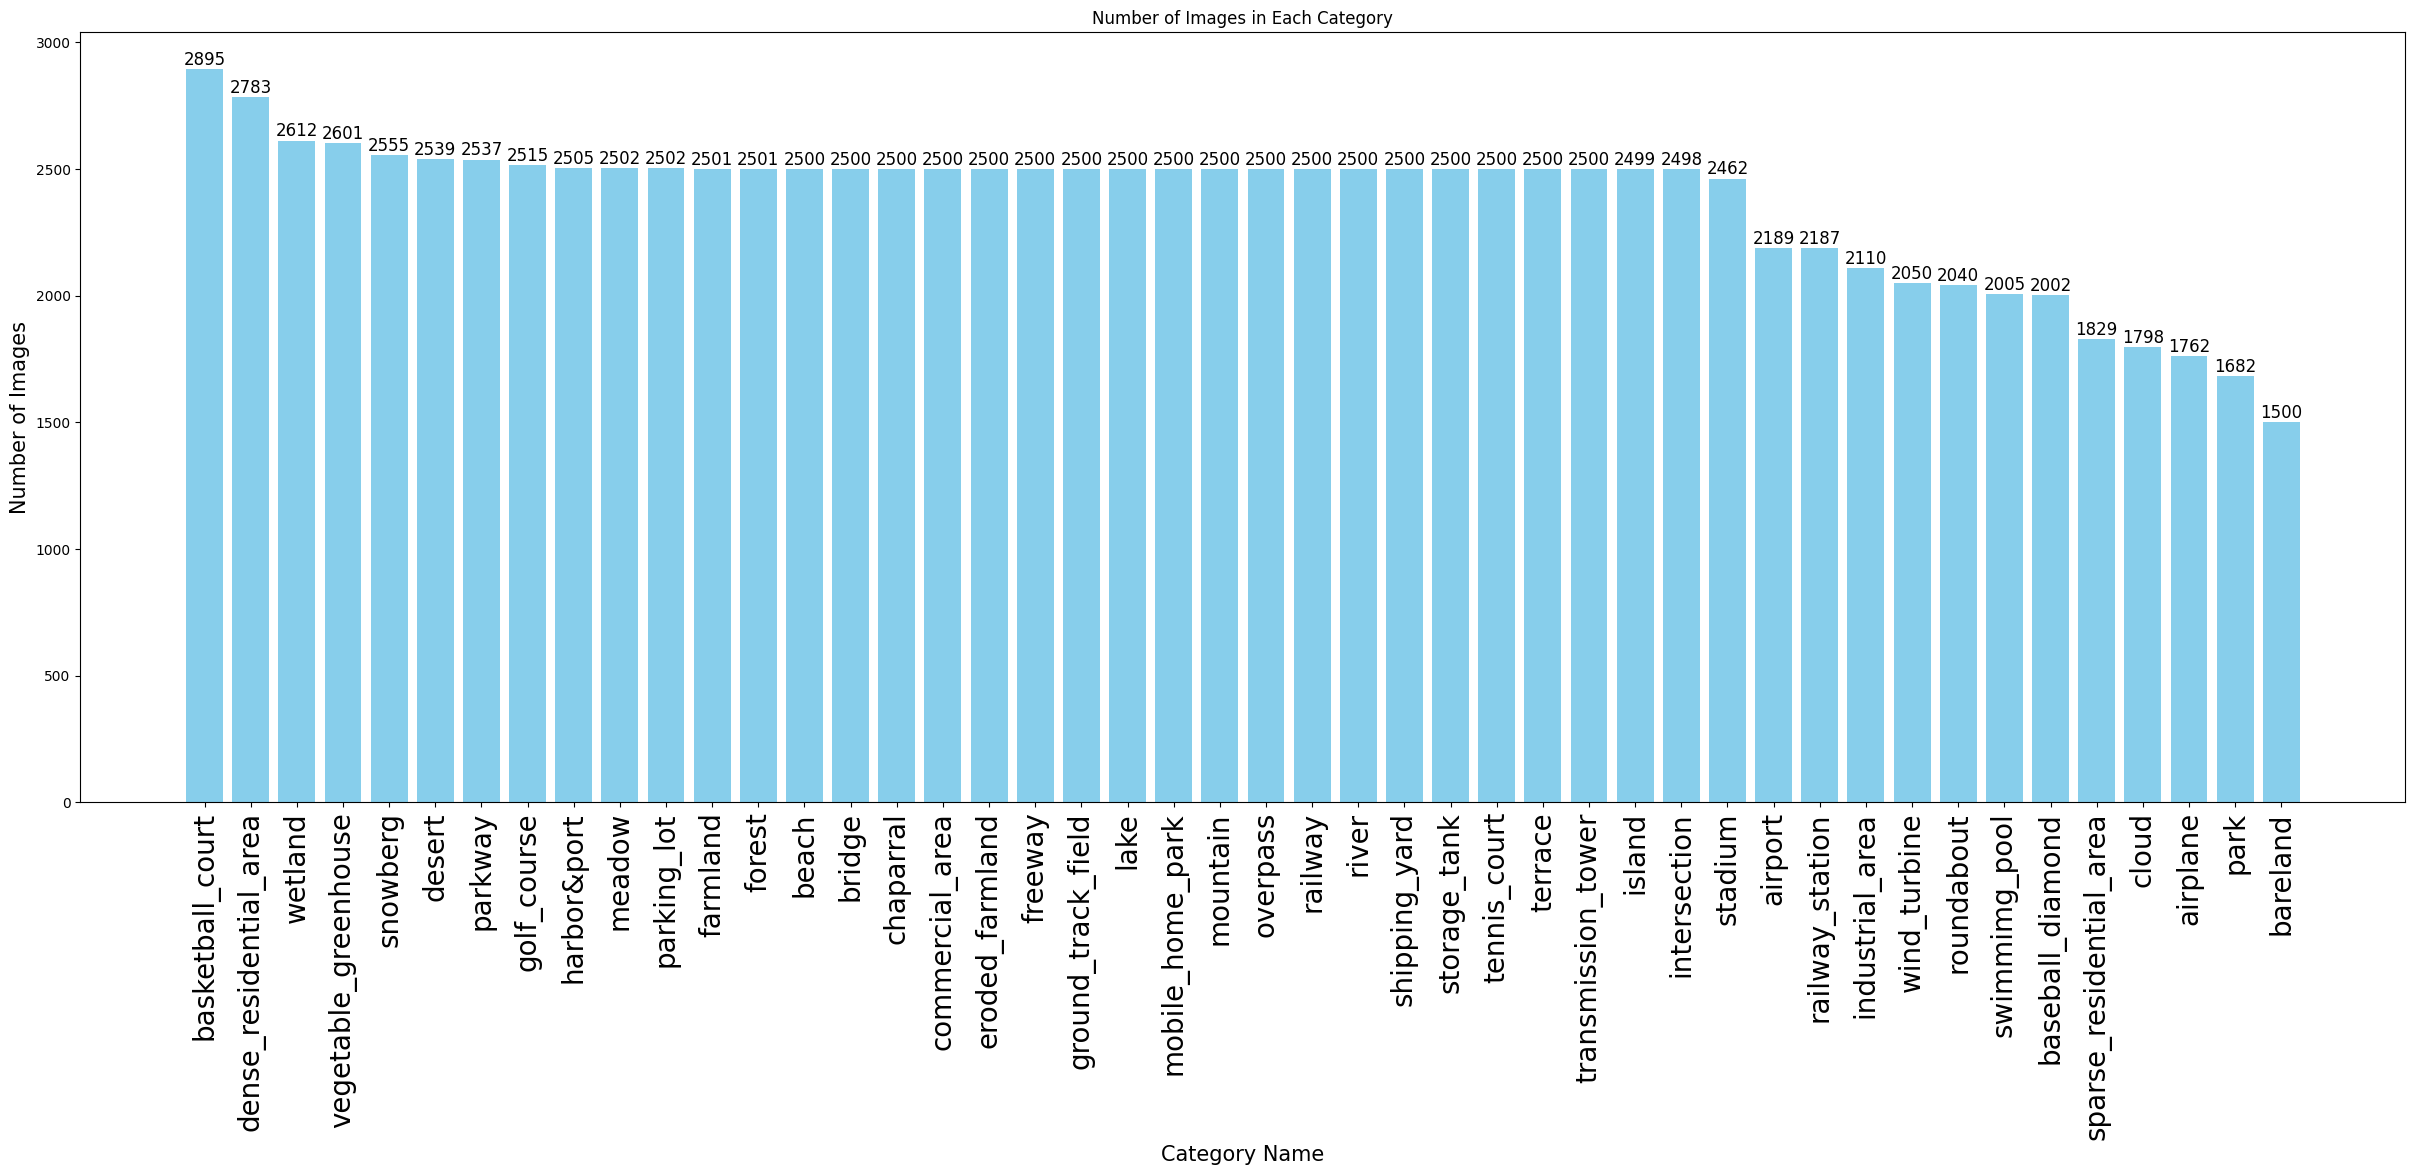

In [137]:
# Plot
rar_files = [f for f in os.listdir(imagefolder_path) if f.endswith(".rar")]
rar_files.sort()
num_images = []

for rar_file in rar_files:
    rar = rarfile.RarFile(imagefolder_path + rar_file)
    num_images.append(len([file for file in rar.namelist() if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]))

rar_files = [rar_file[:-4] for rar_file in rar_files]
file_image_pairs = list(zip(rar_files, num_images))
file_image_pairs.sort(key=lambda x: x[1], reverse=True)
sorted_rar_files, sorted_num_images = zip(*file_image_pairs)

plt.figure(figsize=(30,10))
plt.bar(sorted_rar_files, sorted_num_images, color='skyblue')
plt.xticks(rotation=90, fontsize=20)
plt.xlabel("Category Name", fontsize=15)
plt.ylabel("Number of Images", fontsize=15)
plt.title("Number of Images in Each Category")

for i, num in enumerate(sorted_num_images):
    plt.text(i, num+1, str(num), ha='center', va='bottom', fontsize=12)

plt.show()

In [138]:
rar_files = [f for f in os.listdir(imagefolder_path) if f.endswith(".rar")]
rar_files.sort()

file_names = {}

for rar_file in rar_files:
    rar = rarfile.RarFile(os.path.join(imagefolder_path, rar_file))
    file_names[rar_file[:-4]] = [file for file in rar.namelist() if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]

In [139]:
file_names.keys()

dict_keys(['airplane', 'airport', 'bareland', 'baseball_diamond', 'basketball_court', 'beach', 'bridge', 'chaparral', 'cloud', 'commercial_area', 'dense_residential_area', 'desert', 'eroded_farmland', 'farmland', 'forest', 'freeway', 'golf_course', 'ground_track_field', 'harbor&port', 'industrial_area', 'intersection', 'island', 'lake', 'meadow', 'mobile_home_park', 'mountain', 'overpass', 'park', 'parking_lot', 'parkway', 'railway', 'railway_station', 'river', 'roundabout', 'shipping_yard', 'snowberg', 'sparse_residential_area', 'stadium', 'storage_tank', 'swimmimg_pool', 'tennis_court', 'terrace', 'transmission_tower', 'vegetable_greenhouse', 'wetland', 'wind_turbine'])

In [140]:
for key in file_names.keys():
    file_names[key] = [file.split("/")[1] for file in file_names[key]]

In [141]:
label_path = "/Users/SongYoungOh/Documents/bassconnections/data/MLRSNet A Multi-label High Spatial Resolution Remote Sensing Dataset for Semantic Scene Understanding/Labels/"

csv_files = [f for f in os.listdir(label_path) if f.endswith(".csv")]
csv_files.sort()

csv_dfs = {}
for csv_file in csv_files:
    csv_dfs[csv_file] = pd.read_csv(os.path.join(label_path, csv_file))

for csv_file, csv_df in csv_dfs.items():
    corresponding_rar_file = csv_file[:-4]
    if corresponding_rar_file in file_names:
        num_images_csv = len(csv_df)
        num_images_rar = len(file_names[corresponding_rar_file])

        print("Number of images in", csv_file, ":", num_images_csv)
        print("Number of images in", corresponding_rar_file+'.rar', ":", num_images_rar)
        print("Number of images in", csv_file, "matches number of images in", corresponding_rar_file, ":", num_images_csv == num_images_rar)
        print()

    else:
        print("No corresponding rar file for", csv_file)
        print()

Number of images in airplane.csv : 1762
Number of images in airplane.rar : 1762
Number of images in airplane.csv matches number of images in airplane : True

Number of images in airport.csv : 2189
Number of images in airport.rar : 2189
Number of images in airport.csv matches number of images in airport : True

Number of images in bareland.csv : 1500
Number of images in bareland.rar : 1500
Number of images in bareland.csv matches number of images in bareland : True

Number of images in baseball_diamond.csv : 2002
Number of images in baseball_diamond.rar : 2002
Number of images in baseball_diamond.csv matches number of images in baseball_diamond : True

Number of images in basketball_court.csv : 2895
Number of images in basketball_court.rar : 2895
Number of images in basketball_court.csv matches number of images in basketball_court : True

Number of images in beach.csv : 2500
Number of images in beach.rar : 2500
Number of images in beach.csv matches number of images in beach : True

Numb